<a href="https://colab.research.google.com/github/Venchislav/Neural-Networks/blob/main/MNIST_KERAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [130]:
df = pd.read_csv('/content/sample_data/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [131]:
from sklearn.model_selection import train_test_split

In [132]:
X = df.drop('label', axis=1)
y = df['label']

In [133]:
X = X / 255

In [134]:
import random

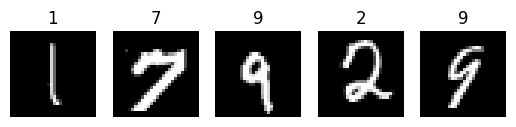

In [135]:
_, ax = plt.subplots(nrows=1, ncols=5)
for i in range(5):
  val = random.randint(0, df.shape[0])
  a = X.loc[val, :]
  a = np.array(a).reshape(28, 28)
  ax[i].set_axis_off()
  ax[i].set_title(str(y[val]))
  ax[i].imshow(a, cmap='gray');

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [137]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=[X.shape[1]]),
    keras.layers.Dense(10)
])

In [138]:
model.compile(
    optimizer='adam',
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [139]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1050/1050 [==============================] - 4s 3ms/step - loss: 0.3153 - accuracy: 0.9109
Epoch 2/5
1050/1050 [==============================] - 4s 3ms/step - loss: 0.1435 - accuracy: 0.9589
Epoch 3/5
1050/1050 [==============================] - 5s 4ms/step - loss: 0.1007 - accuracy: 0.9699
Epoch 4/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0762 - accuracy: 0.9769
Epoch 5/5
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0565 - accuracy: 0.9831


In [140]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

263/263 - 1s - loss: 0.1176 - accuracy: 0.9658 - 529ms/epoch - 2ms/step
Accuracy is: 0.965833306312561


In [141]:
print(f'Accuracy is: {test_acc*100}%')

Accuracy is: 96.5833306312561%


<img src='https://preview.redd.it/vj80r8zaw0ta1.png?width=640&crop=smart&auto=webp&s=75d721f98b1a0622efb90ca06005a0b7b64836f7' width=50%>